In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(10027, 32)
(10027, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 24] == 1)[0]
X_relative_footsteps_continuous_absolute_RR_swing = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_RR_swing = Y_relative_footsteps_continuous_absolute[idxs]

## Predict RR foot -> x

In [8]:
X_relative_footsteps_continuous_absolute_RR_swing[0, :]

array([ 1.00000001e-01,  0.00000000e+00,  0.00000000e+00,  9.11893692e-02,
       -1.77642498e-01, -1.44425490e-03, -3.79832882e-04,  2.90665488e-02,
        2.75820694e-03,  2.20000000e-01,  2.09000000e-01, -4.05000000e-01,
        2.42000000e-01, -1.84000000e-01, -4.05000000e-01, -2.44000000e-01,
        1.55000000e-01, -4.00000000e-01, -2.75000000e-01, -1.27000000e-01,
       -4.01000000e-01,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000001e-01,  0.00000000e+00,  0.00000000e+00,
       -5.82474492e+00, -2.60886531e-01, -5.81433923e+00, -2.39451327e-01])

In [9]:
Y_relative_footsteps_continuous_absolute_RR_swing[0, :]

array([ 0.02640569,  0.0004352 ,  0.03640569, -0.0035648 ])

### Linear Regression

In [13]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RR_swing[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RR_swing[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9983407511755409
RMSE:  0.003369571959708536
The lowest error is:  1.2150520015408173e-06
The highest error is:  0.022851670025364312
The avg. error is:  0.002227549554519619


In [14]:
model_rr_relative_swinging_x.coef_

array([[ 0.3080201 ,  0.04652164,  0.0542705 , -0.12590866, -0.02915219,
         0.03601599, -0.00724633, -0.01551572, -0.07517701, -0.03526347,
        -0.13263748,  0.08920247, -0.25307634,  0.15897949, -0.14097096,
        -0.44989631,  0.04945942]])

In [15]:
model_rr_relative_swinging_x.intercept_

array([-0.07495486])

Text(0, 0.5, 'Predictions')

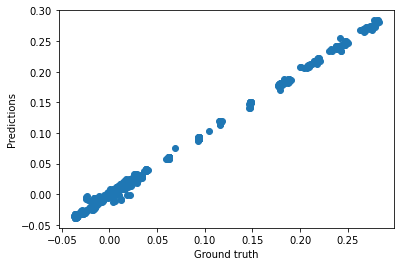

In [16]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [17]:
#%store model_rr_relative_swinging_x

In [18]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [19]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [34]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RR_swing[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RR_swing[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9951642954418828
RMSE:  0.00419767969603675
The lowest error is:  3.2357106040520334e-06
The highest error is:  0.026234208546578097
The avg. error is:  0.002728478029020097


In [35]:
model_rr_relative_swinging_y.coef_

array([[ 0.00048411,  0.34334255,  0.05344302,  0.01748407, -0.13906107,
         0.1623064 ,  0.00998895, -0.04684145, -0.08470929,  0.03884878,
        -0.15501406, -0.02713333,  0.01583715, -0.077703  , -0.09518424,
        -0.00421451, -0.4838934 ]])

In [36]:
model_rr_relative_swinging_y.intercept_

array([-0.06104703])

Text(0, 0.5, 'Predictions')

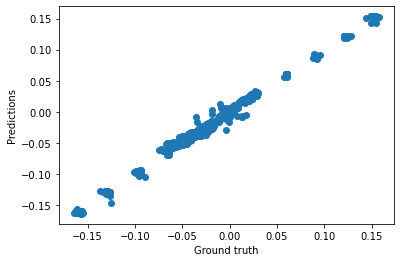

In [37]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [22]:
#%store model_rr_relative_swinging_y

In [23]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_rr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_y.sav")